# Set Working Directory

In [24]:
import os

In [25]:
os.chdir("C:/R")

# Load Dataset

In [26]:
import pandas as pd

In [27]:
data = pd.read_csv("SpamClassifier/smsspamcollection/SMSSpamCollection",
                  sep = "\t",
                  names = ["label", "message"])

In [28]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [30]:
data.shape

(5572, 2)

# Check for Missing Values If Any

In [31]:
data.isnull().values.any()

False

# Check for Imbalanced Dataset

In [55]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Text(0, 0.5, 'Frequency')

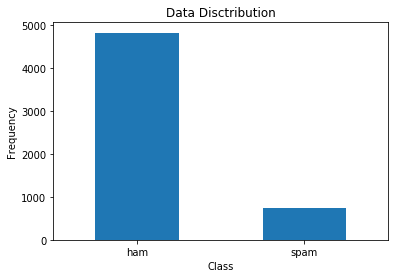

In [33]:
import matplotlib.pyplot as plt
plot_label = pd.value_counts(data["label"], sort = True)
plot_label.plot(kind = "bar", rot = 0)
plt.title("Data Disctribution")
plt.xticks(range(2), ["ham", "spam"])
plt.xlabel("Class")
plt.ylabel("Frequency")

# Categorize the Dataset into Dependent and Independent Sets

In [34]:
X = data.drop("label", axis = 1)

In [35]:
X.head()

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
X.shape

(5572, 1)

In [37]:
Y = data.drop("message", axis = 1)

In [38]:
Y.head()

,label
0,ham
1,ham
2,spam
3,ham
4,ham


In [39]:
Y.shape

(5572, 1)

In [40]:
Y = pd.get_dummies(Y)

In [41]:
Y.head()

,label_ham,label_spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [42]:
Y = Y.iloc[:,1]

In [43]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

numRows = data.shape[0]
corpus = []
lemmatizer = WordNetLemmatizer()
for index in range(numRows):
    review = re.sub('[^a-zA-Z]', ' ', X["message"][index])
    review = review.upper()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)


# Building TF-IDF Model

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tf = TfidfVectorizer()
X = Tf.fit_transform(corpus).toarray()

# Apply Oversampling to handle imbalanced dataset

In [45]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 42)
X_res, Y_res = smk.fit_sample(X, Y)
print(X_res.shape, Y_res.shape)

Using TensorFlow backend.


(9650, 7759) (9650,)


Text(0, 0.5, 'Frequency')

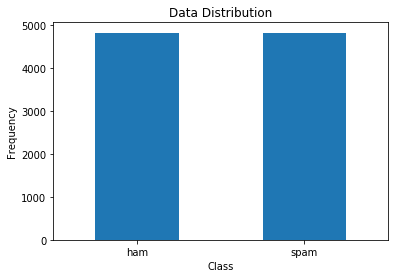

In [49]:
count_class = pd.value_counts(Y_res, sort = True)
count_class.plot(kind = "bar", rot = 0)
plt.title("Data Distribution")
plt.xticks(range(2), ["ham", "spam"])
plt.xlabel("Class")
plt.ylabel("Frequency")

# Split into train and test datasets

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 0)

# Building Naive-Bayes Classifier Model

In [51]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Create Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[1451    0]
 [  76  145]]


# Check Model Accuracy

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Model Accuracy = {}".format(accuracy))

Model Accuracy = 0.9545454545454546
